# Retail Sales Dataset Analysis

## 1. Install & Import  Required Libraries

In [ ]:
#Install libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 2. Data Loading and Cleaning

In [ ]:
# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Display basic info
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

First 5 rows:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100



Missing values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Number of duplicates: 0


## 3. Descriptive Statistics

In [ ]:
# Descriptive statistics for numerical columns
print("\nNumerical Columns Statistics:")
display(df.select_dtypes(include='number').describe())

# For categorical columns
print("\nCategorical Columns Statistics:")
display(df.select_dtypes(exclude='number').describe())

# Mode calculations
print("\nMode Values:")
print("Gender mode:", df['Gender'].mode()[0])
print("Product Category mode:", df['Product Category'].mode()[0])
print("Age mode:", df['Age'].mode()[0])


Numerical Columns Statistics:


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000



Categorical Columns Statistics:


,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST001,Female,Clothing
freq,11,1,510,351



Mode Values:
Gender mode: Female
Product Category mode: Clothing
Age mode: 43


## 4. Time Series Analysis

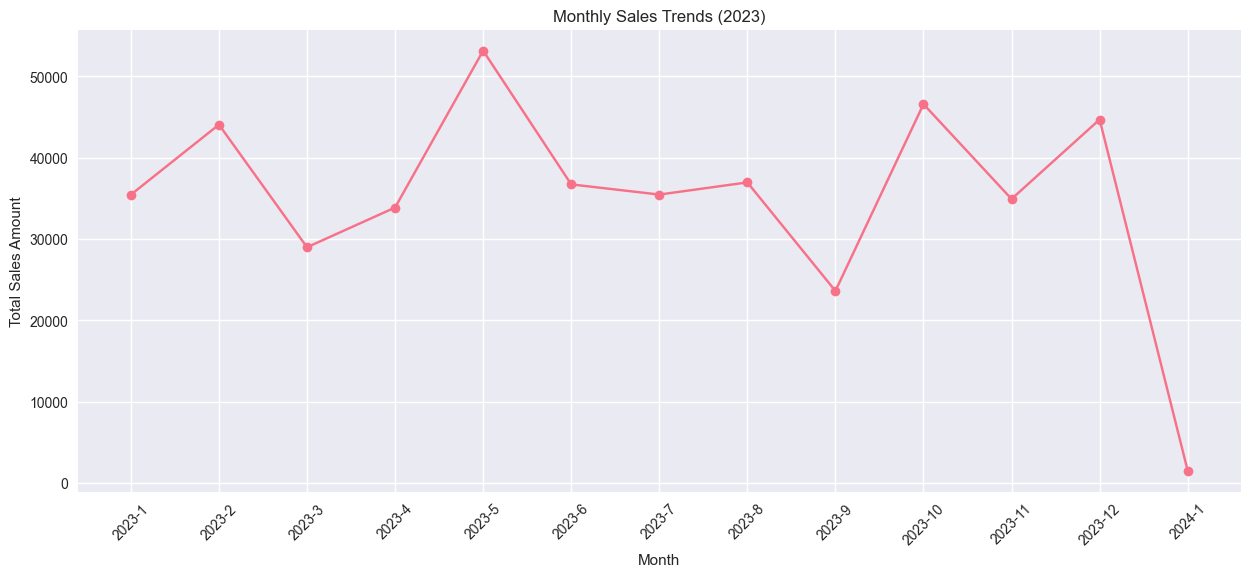

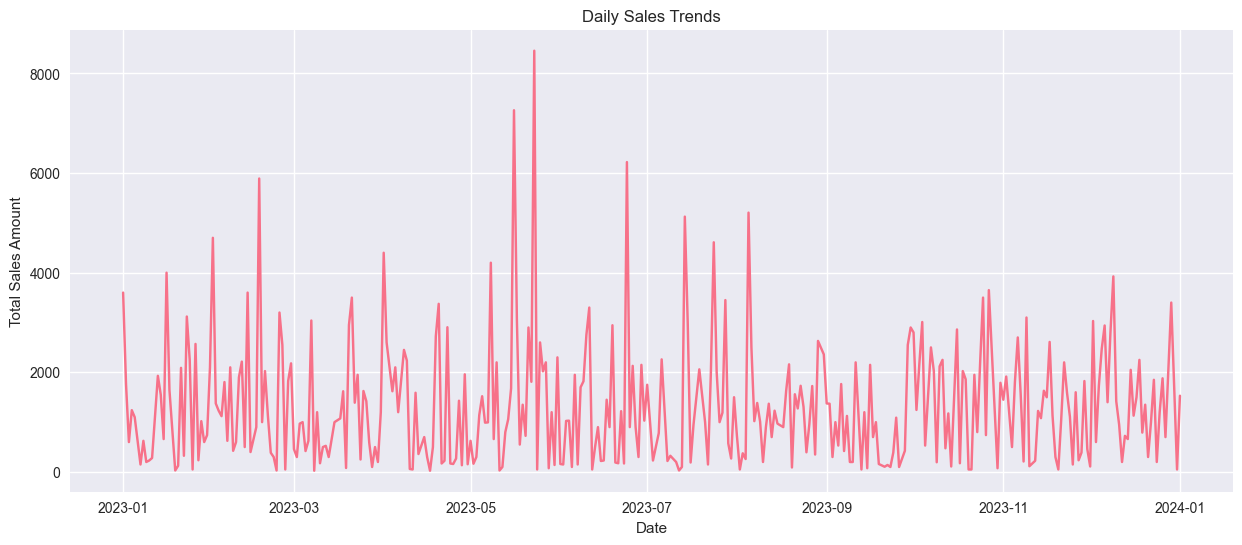

In [ ]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Monthly sales trends
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Total Amount'], marker='o')
plt.title('Monthly Sales Trends (2023)')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Daily sales trends
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'])
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

## 4. Customer and Product Analysis

### Customer Demographics

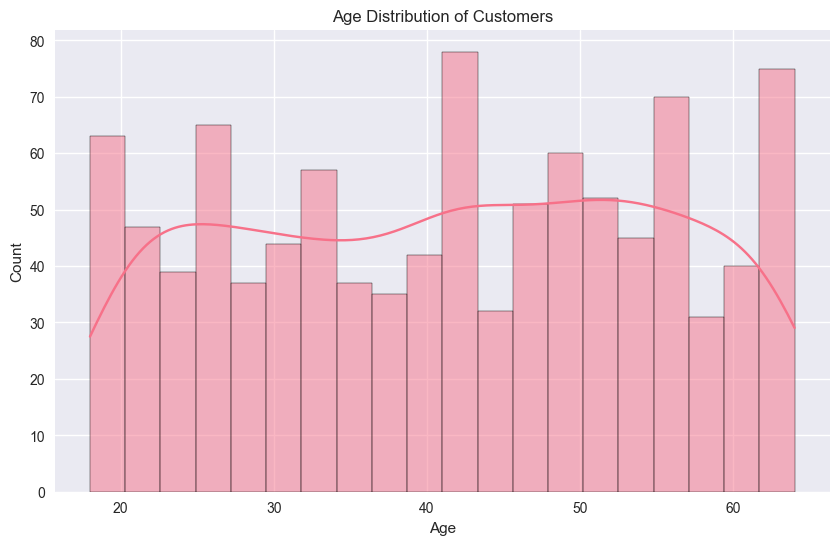

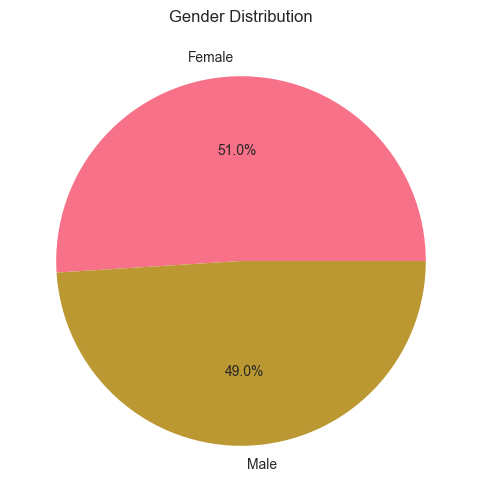

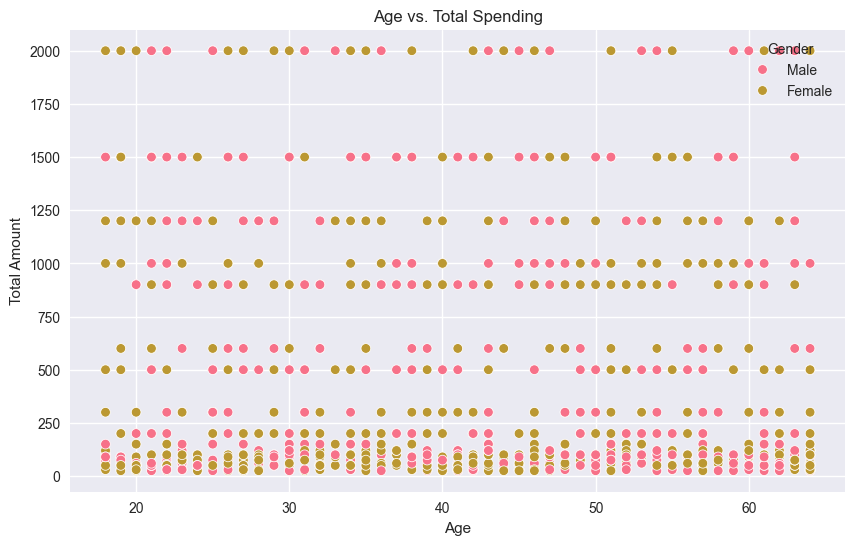

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Age vs. Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', hue='Gender', data=df)
plt.title('Age vs. Total Spending')
plt.show()

### Product Analysis

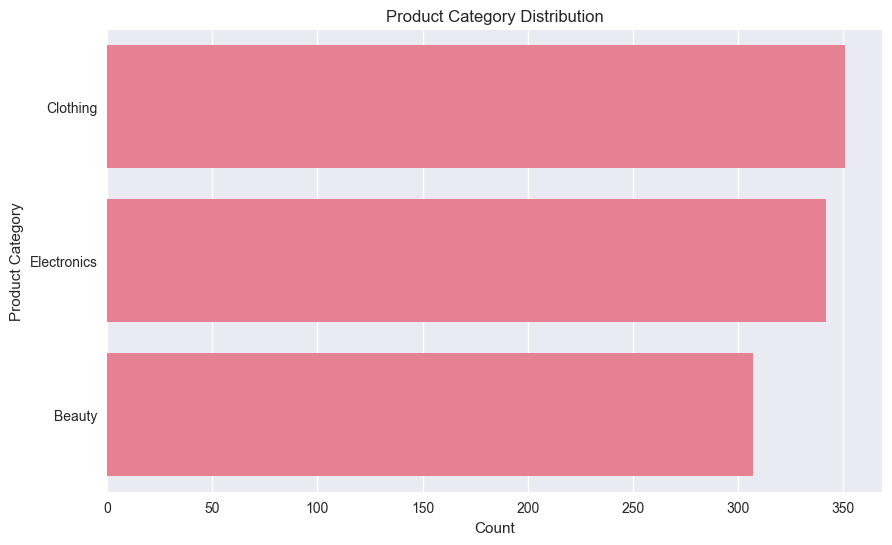

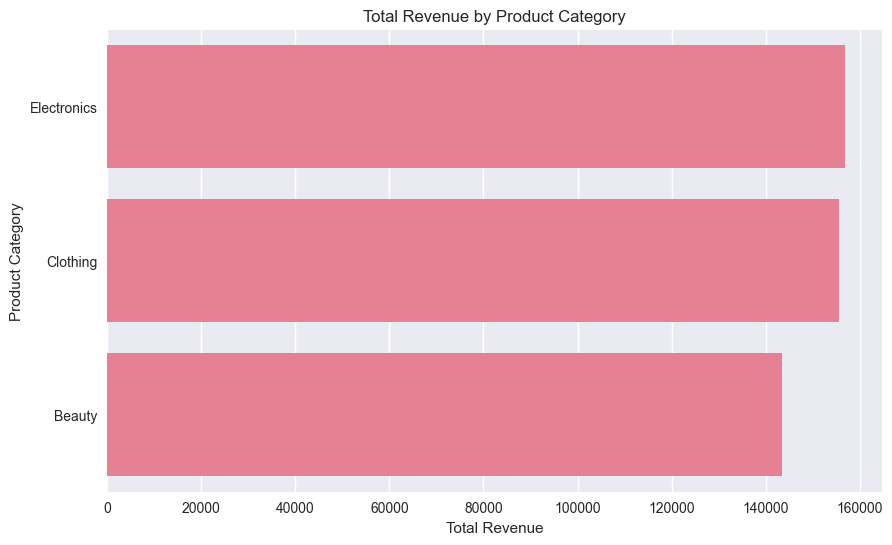

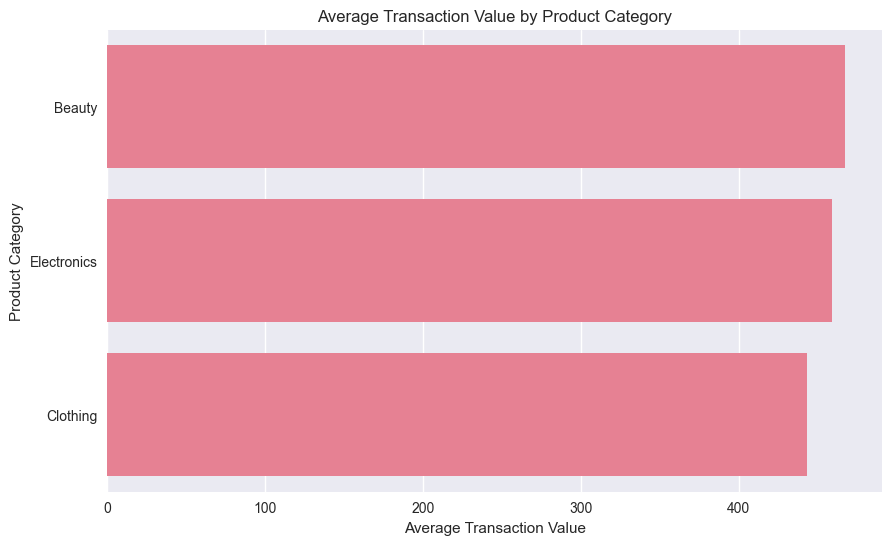

In [ ]:
# Product category distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Product Category', data=df, order=df['Product Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

# Revenue by product category
category_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index)
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

# Average transaction value by product category
avg_transaction = df.groupby('Product Category')['Total Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transaction.values, y=avg_transaction.index)
plt.title('Average Transaction Value by Product Category')
plt.xlabel('Average Transaction Value')
plt.ylabel('Product Category')
plt.show()

## 5. Advanced Visualizations

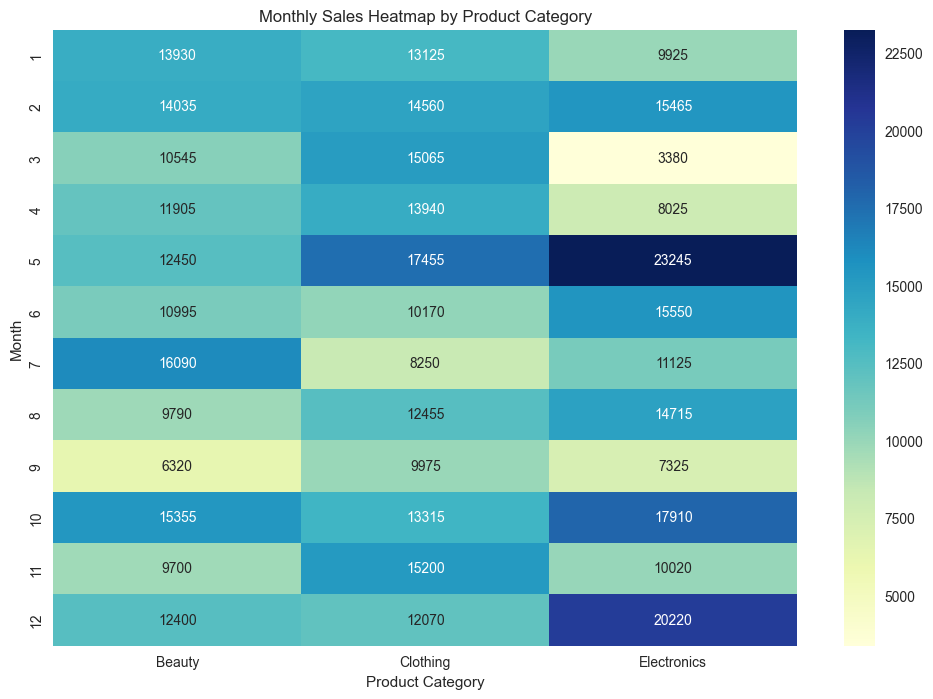

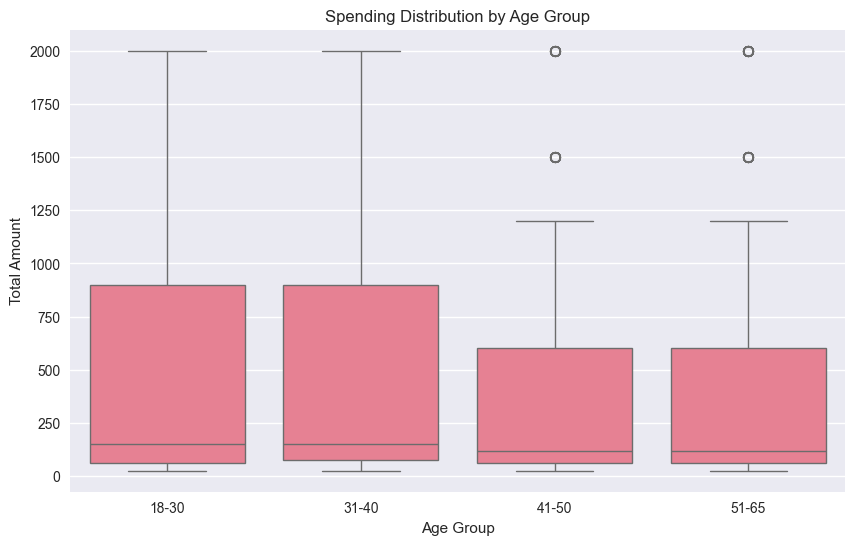

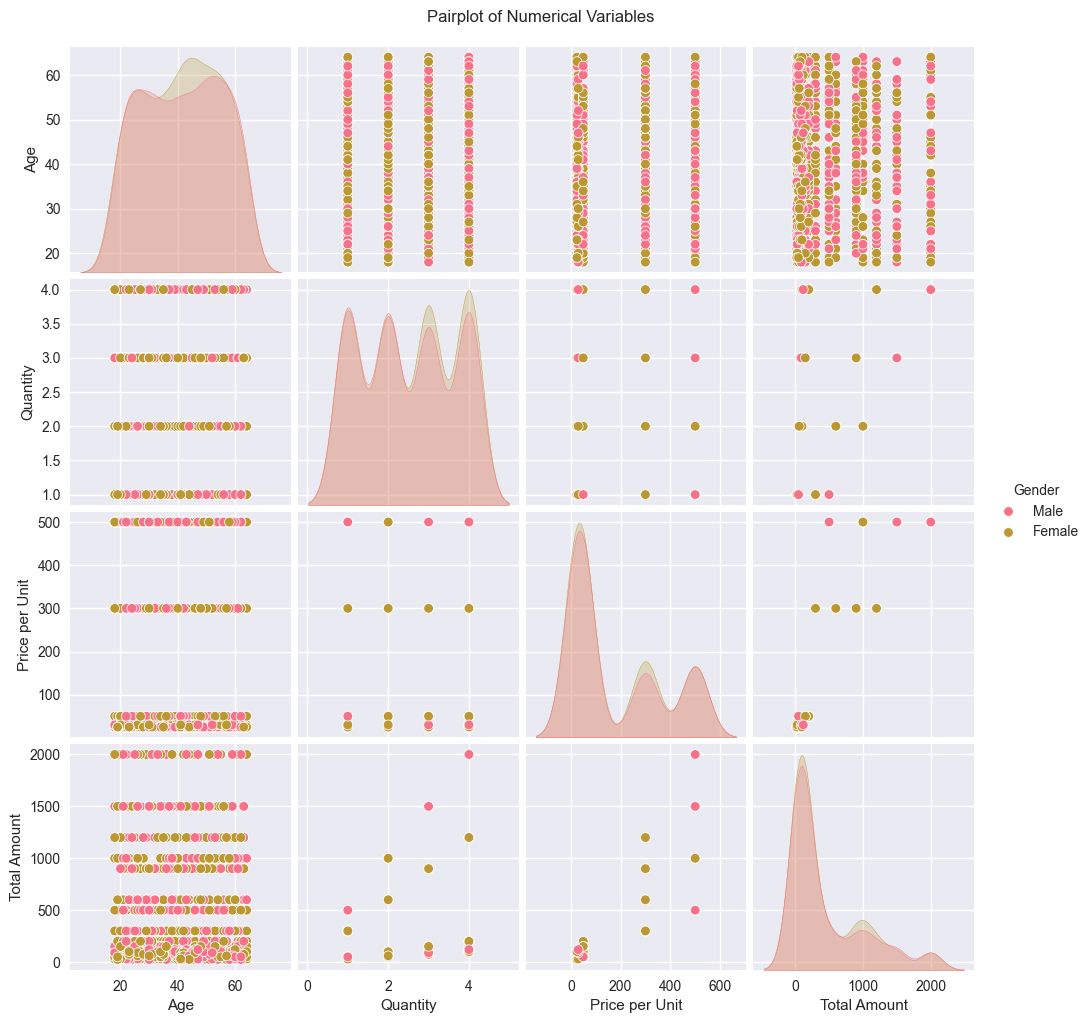

In [ ]:
# Heatmap of sales by month and product category
monthly_category = df.groupby(['Month', 'Product Category'])['Total Amount'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_category, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Monthly Sales Heatmap by Product Category')
plt.show()

# Boxplot of spending by age group
df['Age Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 65], labels=['18-30', '31-40', '41-50', '51-65'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Total Amount', data=df)
plt.title('Spending Distribution by Age Group')
plt.show()

# Pairplot of numerical variables
sns.pairplot(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Gender']], hue='Gender')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

## 6. Recommendations

Based on the analysis, here are actionable recommendations:

1. **Product Category Strategies**:
   - Focus marketing efforts on Electronics during high-sales months (visible in heatmap)
   - Bundle Beauty products to increase average transaction value
   - Consider promotions for Clothing to maintain its high sales volume

2. **Customer Segmentation**:
   - Develop targeted campaigns for different age groups
   - Create loyalty programs for frequent female buyers (slightly underrepresented)
   - Offer age-specific promotions (different spending patterns by age)

3. **Inventory Management**:
   - Stock more Electronics before peak sales months
   - Maintain consistent Beauty product inventory due to steady demand
   - Monitor Clothing inventory closely due to high sales volume

4. **Pricing Strategies**:
   - Consider dynamic pricing for Electronics during peak demand
   - Bundle lower-priced Beauty items to increase basket size
   - Implement volume discounts for Clothing purchases

5. **Seasonal Planning**:
   - Prepare marketing campaigns before identified peak months
   - Analyze what drives Electronics sales peaks (holidays, events, etc.)
   - Plan staffing and inventory based on monthly sales patterns

6. **Further Analysis Opportunities**:
   - Investigate why certain months have higher sales
   - Analyze customer retention and repeat purchase behavior
   - Examine the impact of pricing changes on sales volume

In [ ]:
# Save the cleaned and enriched dataset for further analysis
df.to_csv('retail_sales_cleaned.csv', index=False)
print("Analysis complete. Cleaned dataset saved.")

Analysis complete. Cleaned dataset saved.
